# BÀI TẬP ÔN TẬP - DATA ANALYSIS

Nội dung: Decision Analysis, Regression Model, Forecasting

## Dataset

### 1. house_prices_hcmc.csv

**Mô tả**: Dữ liệu giá nhà tại TP.HCM

**Số lượng**: 100 houses

**Cột dữ liệu**:
- House_ID: Mã nhà (H001-H100)
- District: Quận (District 1, District 2, District 7, Thu Duc)
- Area_sqm: Diện tích (m²)
- Bedrooms: Số phòng ngủ (1-5)
- Bathrooms: Số phòng tắm (1-3)
- Floor_Level: Tầng (1-7)
- Age_years: Tuổi nhà (0-30 năm)
- Distance_to_Center_km: Khoảng cách đến trung tâm (km)
- Has_Parking: Có chỗ đậu xe (Yes/No)
- Listing_Date: Ngày đăng tin
- Price_Billion_VND: Giá (tỷ VND)

### 2. monthly_sales_data.csv

**Mô tả**: Dữ liệu doanh số bán hàng theo tháng

**Thời gian**: 2020-01 đến 2024-09 (57 tháng)

**Cột dữ liệu**:
- Date: Ngày (YYYY-MM-DD)
- Year: Năm
- Month: Tháng (1-12)
- Month_Name: Tên tháng
- Quarter: Quý (Q1-Q4)
- Sales_Million_VND: Doanh số (triệu VND)
- Sales_Growth_%: Tăng trưởng (%)
- Number_of_Orders: Số đơn hàng
- New_Customers: Khách hàng mới
- Marketing_Spend_Million_VND: Chi phí marketing
- [Category]_%: Phần trăm doanh số theo danh mục

---

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')


## PHẦN 1: DECISION ANALYSIS

### Bài 1: EMV và EVPI

PAYOFF TABLE (Triệu VND):
                High Demand  Medium Demand  Low Demand
Launch Product          500            200        -100
Do Not Launch             0              0           0

EXPECTED MONETARY VALUE (EMV) (Triệu VND):
Launch Product    230.0
Do Not Launch       0.0
dtype: float64

Optimal Decision: Launch Product (EMV = 230.00 Triệu VND)

Expected Value with Perfect Information (EV w/ PI): 250.00 Triệu VND
Expected Value of Perfect Information (EVPI): 20.00 Triệu VND


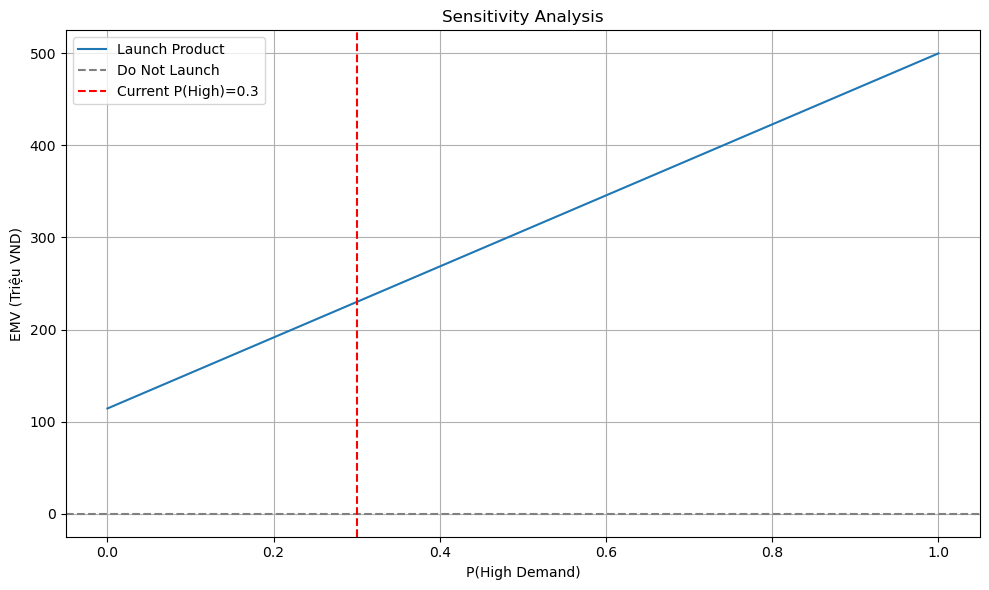

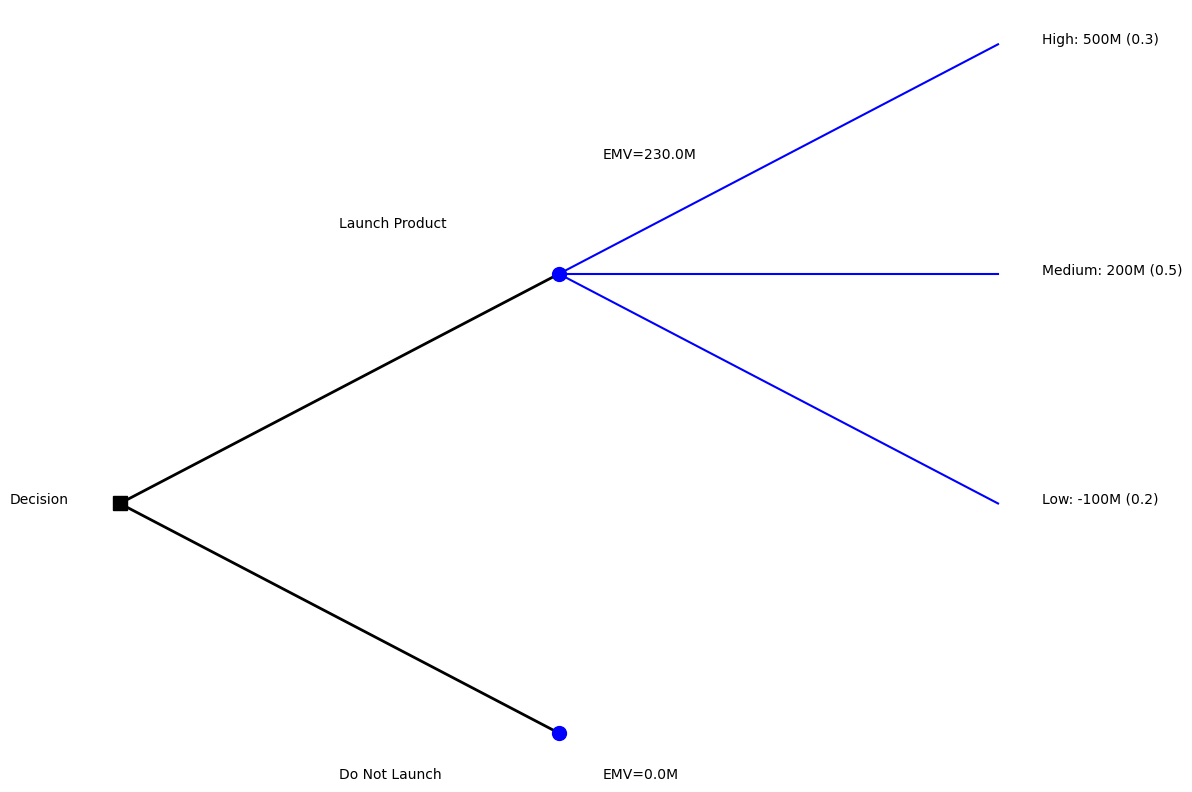


KẾT QUẢ:
EMV Launch Product: 230.00 triệu VND
EMV Do Not Launch: 0.00 triệu VND
Quyết định tối ưu: Launch Product
EVPI: 20.00 triệu VND


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu
decisions = ['Launch Product', 'Do Not Launch']
states = ['High Demand', 'Medium Demand', 'Low Demand']
probs = [0.3, 0.5, 0.2]
payoffs = pd.DataFrame({
    'High Demand': [500, 0],
    'Medium Demand': [200, 0],
    'Low Demand': [-100, 0]
}, index=decisions)

print("PAYOFF TABLE (Triệu VND):")
print(payoffs)

# 1. Tính EMV
emv = {d: (payoffs.loc[d] * probs).sum() for d in decisions}
print("\nEMV:", pd.DataFrame(list(emv.items()), columns=['Decision', 'EMV']))

# 2. Quyết định tối ưu
optimal = max(emv, key=emv.get)
print(f"\nQuyết định tối ưu: {optimal} (EMV = {emv[optimal]} triệu VND)")

# 3. EVPI
evpi = sum(payoffs[s].max() * p for s, p in zip(states, probs)) - emv[optimal]
print(f"EVPI = {evpi} triệu VND")

# 4. Sensitivity Analysis
p_range = np.linspace(0, 1, 100)
emv_launch = [500*p + 200*(1-p)/2 - 100*(1-p)/2 for p in p_range]

plt.figure(figsize=(10, 6))
plt.plot(p_range, emv_launch, label='Launch Product')
plt.axhline(y=0, label='Do Not Launch')
plt.axvline(x=0.3, color='r', linestyle='--', label='Current P(High)=0.3')
plt.xlabel('P(High Demand)')
plt.ylabel('EMV (Triệu VND)')
plt.title('Sensitivity Analysis')
plt.legend()
plt.grid(True)

# 5. Decision Tree
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(0, 0, 'ks', ms=10)  # Decision node
ax.plot([0, 2, 2], [0, 1, -1], 'k-', lw=2)  # Decision branches
ax.plot(2, 1, 'bo', ms=10)  # Chance node
for i, y in enumerate([2, 1, 0]): ax.plot([2, 4], [1, y], 'b-', lw=1.5)  # Chance branches

# Labels
labels = [
    (-0.5, 0, 'Decision'),
    (1, 1.2, 'Launch Product'),
    (1, -1.2, 'Do Not Launch'),
    (2.2, 1.5, f'EMV={emv["Launch Product"]}M'),
    (4.2, 2, 'High: 500M (0.3)'),
    (4.2, 1, 'Medium: 200M (0.5)'),
    (4.2, 0, 'Low: -100M (0.2)'),
    (4.2, -1, 'EMV=0M')
]
for x, y, txt in labels: ax.text(x, y, txt, fontsize=10)

ax.axis('off')
plt.tight_layout()
plt.show()

# Tổng hợp
print("\nKẾT QUẢ:")
for k, v in emv.items(): print(f"EMV {k}: {v} triệu VND")
print(f"Quyết định tối ưu: {optimal}\nEVPI: {evpi} triệu VND")

### Bài 2: Risk-Return Trade-off

(Phần đọc thêm)

RETURNS TABLE (%):
               Bull Market  Normal Market  Bear Market
Aggressive             30             10          -15
Moderate               15              8           -5
Conservative            8              6            3

RISK-RETURN ANALYSIS:
               Expected Return (%)  Risk (Std Dev)  Sharpe Ratio  \
Aggressive                   8.75       15.958932      0.422961   
Moderate                     6.50        7.228416      0.622543   
Conservative                 5.75        1.785357      2.100420   

              Downside Risk  Sortino Ratio  
Aggressive           11.875       0.568421  
Moderate              5.750       0.782609  
Conservative          1.375       2.727273  

Xác suất lợi nhuận âm:
Aggressive: 29.17%
Moderate: 18.43%
Conservative: 0.06%

Value at Risk (95%):
Aggressive: 17.50%
Moderate: 5.39%
Conservative: -2.81%


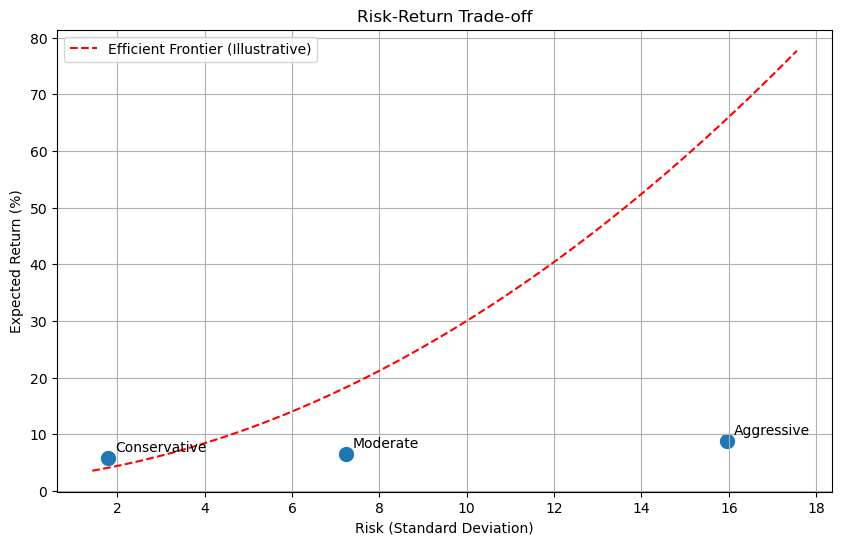

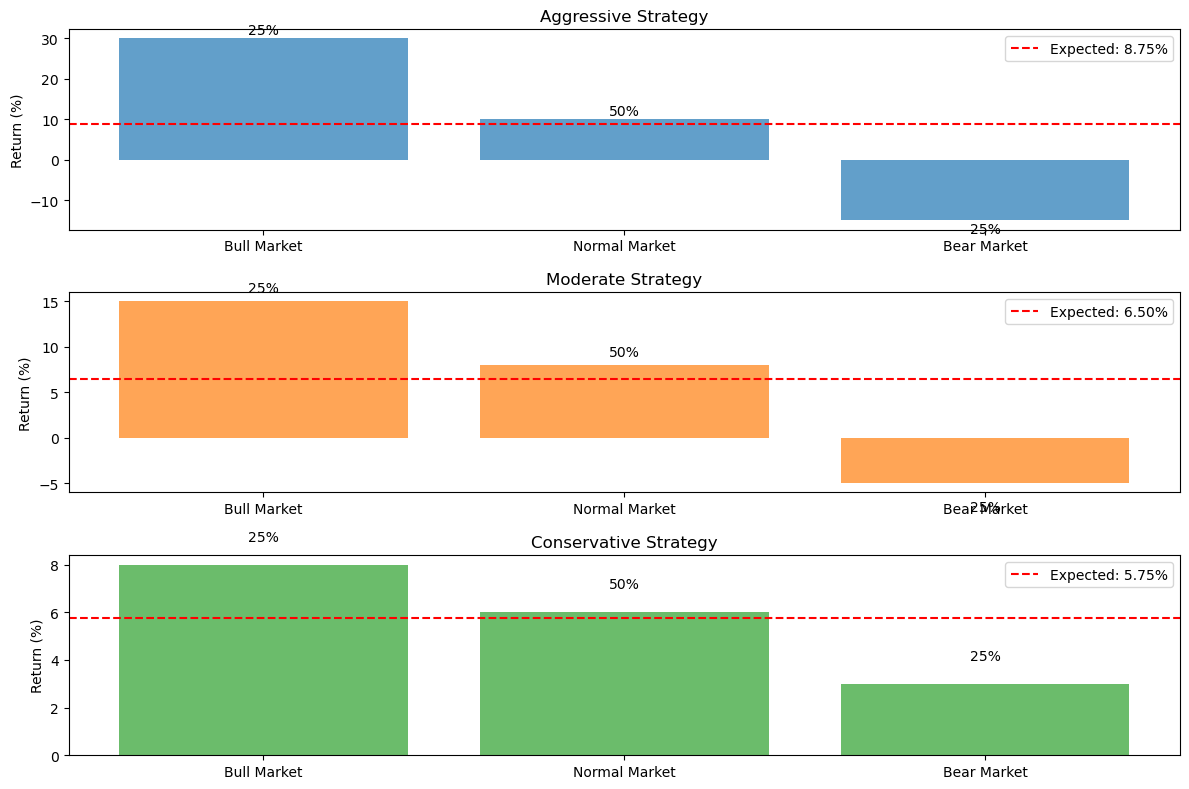

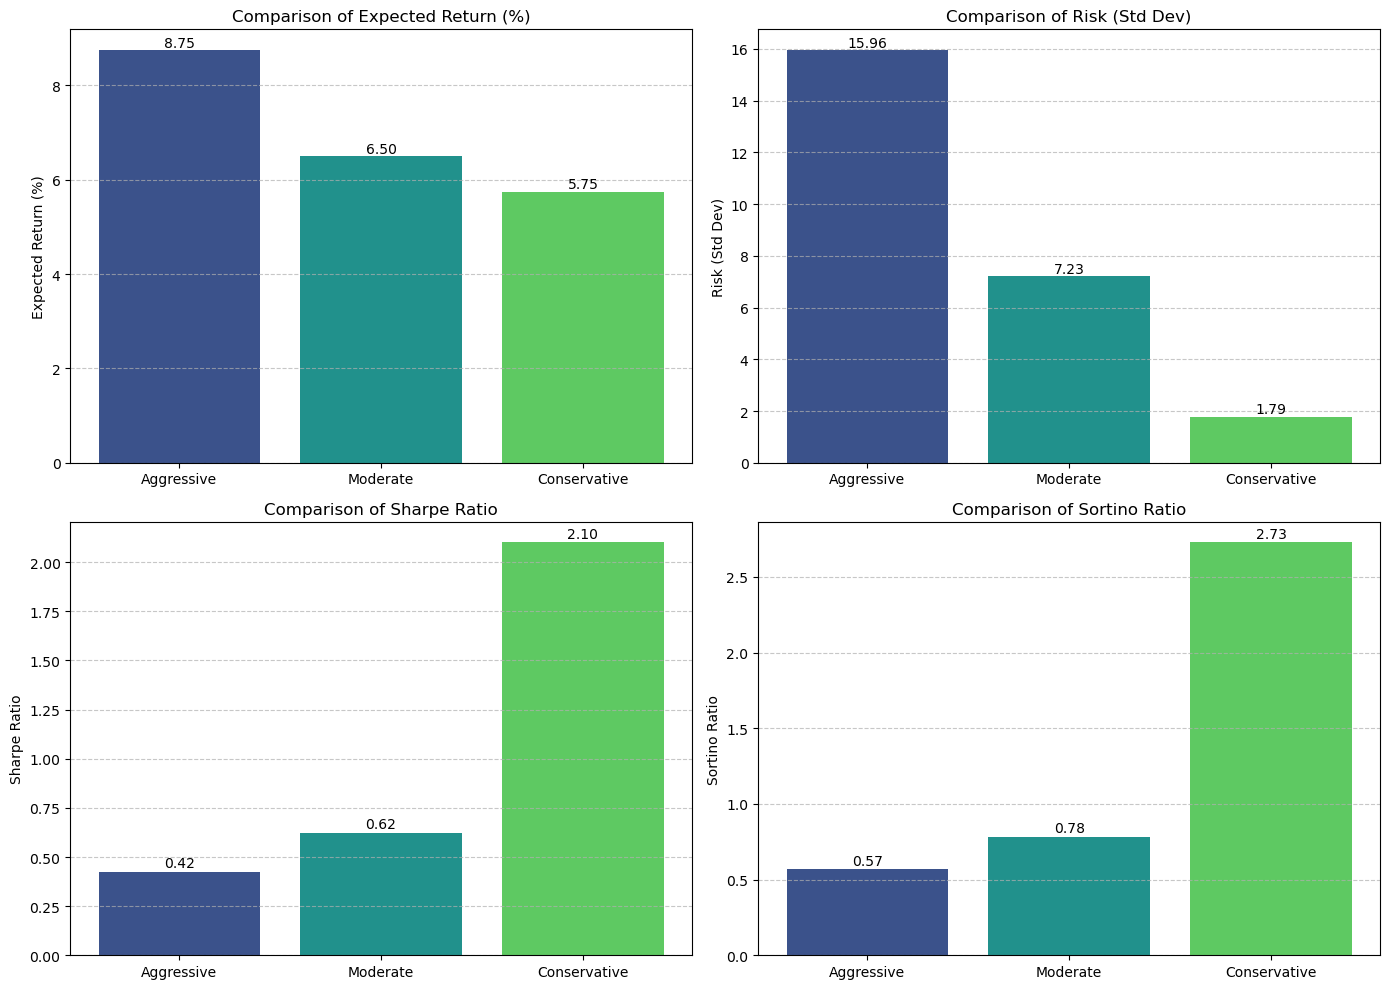

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Dữ liệu
strategies = ['Aggressive', 'Moderate', 'Conservative']
states = ['Bull Market', 'Normal Market', 'Bear Market']
probs = [0.25, 0.50, 0.25]
returns = pd.DataFrame({
    'Bull Market': [30, 15, 8],
    'Normal Market': [10, 8, 6],
    'Bear Market': [-15, -5, 3]
}, index=strategies)

print("RETURNS TABLE (%):\n", returns)

# 1-5. Tính toán các chỉ số
rf_rate = 2
results = pd.DataFrame({
    'Expected Return (%)': {s: (returns.loc[s] * probs).sum() for s in strategies}
})

# Risk & Sharpe Ratio
results['Risk (Std Dev)'] = {s: np.sqrt(((returns.loc[s] - results.loc[s, 'Expected Return (%)'])**2 * probs).sum()) 
                              for s in strategies}
results['Sharpe Ratio'] = (results['Expected Return (%)'] - rf_rate) / results['Risk (Std Dev)']

# Downside Risk & Sortino Ratio
results['Downside Risk'] = {s: np.sqrt((np.minimum(0, returns.loc[s] - results.loc[s, 'Expected Return (%)'])**2 * probs).sum()) 
                            for s in strategies}
results['Sortino Ratio'] = results.apply(
    lambda r: (r['Expected Return (%)'] - rf_rate) / r['Downside Risk'] if r['Downside Risk'] > 0 else float('inf'), 
    axis=1
)

print("\nRISK-RETURN ANALYSIS:\n", results)

# Biểu đồ 1: Risk-Return Trade-off
plt.figure(figsize=(10, 6))
plt.scatter(results['Risk (Std Dev)'], results['Expected Return (%)'], s=100)
for s in strategies:
    plt.annotate(s, (results.loc[s, 'Risk (Std Dev)'], results.loc[s, 'Expected Return (%)']),
                 xytext=(5, 5), textcoords='offset points')

x = np.linspace(results['Risk (Std Dev)'].min() * 0.8, results['Risk (Std Dev)'].max() * 1.1, 100)
plt.plot(x, 2 + 0.8*x + 0.2*x**2, 'r--', label='Efficient Frontier (Illustrative)')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return (%)')
plt.title('Risk-Return Trade-off')
plt.legend()
plt.grid(True)

# Biểu đồ 2: Phân phối lợi nhuận
plt.figure(figsize=(12, 8))
for i, s in enumerate(strategies):
    plt.subplot(3, 1, i+1)
    rets = returns.loc[s].values
    plt.bar(states, rets, alpha=0.7, color=sns.color_palette()[i])
    plt.axhline(y=results.loc[s, 'Expected Return (%)'], color='r', linestyle='--',
                label=f'Expected: {results.loc[s, "Expected Return (%)"]:.2f}%')
    for j, v in enumerate(rets):
        plt.text(j, v + (1 if v >= 0 else -3), f"{probs[j]*100:.0f}%", ha='center')
    plt.title(f'{s} Strategy')
    plt.ylabel('Return (%)')
    plt.legend()
plt.tight_layout()

# Biểu đồ 3: So sánh các chỉ số
metrics = ['Expected Return (%)', 'Risk (Std Dev)', 'Sharpe Ratio', 'Sortino Ratio']
plt.figure(figsize=(14, 10))
for i, m in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    bars = plt.bar(strategies, results[m], color=sns.color_palette("viridis", 3))
    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, h + 0.01, f'{h:.2f}', ha='center', va='bottom')
    plt.title(f'Comparison of {m}')
    plt.ylabel(m)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Phân tích rủi ro bổ sung
print("\nXác suất lợi nhuận âm:")
for s in strategies:
    z = -results.loc[s, 'Expected Return (%)'] / results.loc[s, 'Risk (Std Dev)']
    print(f"{s}: {stats.norm.cdf(z)*100:.2f}%")

print("\nValue at Risk (95%):")
for s in strategies:
    var = -results.loc[s, 'Expected Return (%)'] + 1.645 * results.loc[s, 'Risk (Std Dev)']
    print(f"{s}: {var:.2f}%")

plt.show()

### Bài 3: Minimax Regret

Chọn giải pháp

Minimax Regret Decision: Order 300 (Regret: 40)

Decision Criteria:
           Maximax  Maximin    Laplace  Minimax Regret
Order 100       50       50  50.000000            -100
Order 200      100       30  76.666667             -50
Order 300      150       10  80.000000             -40


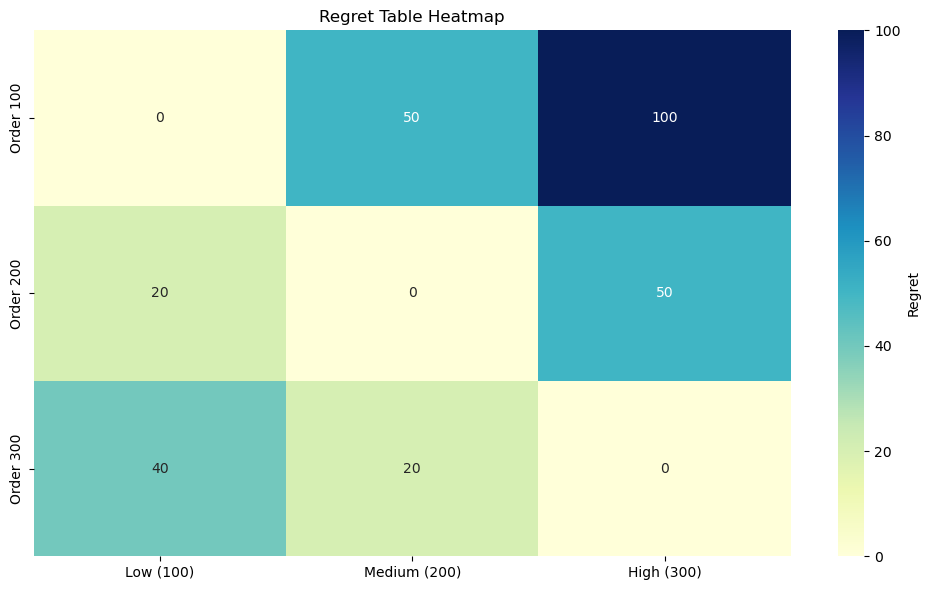

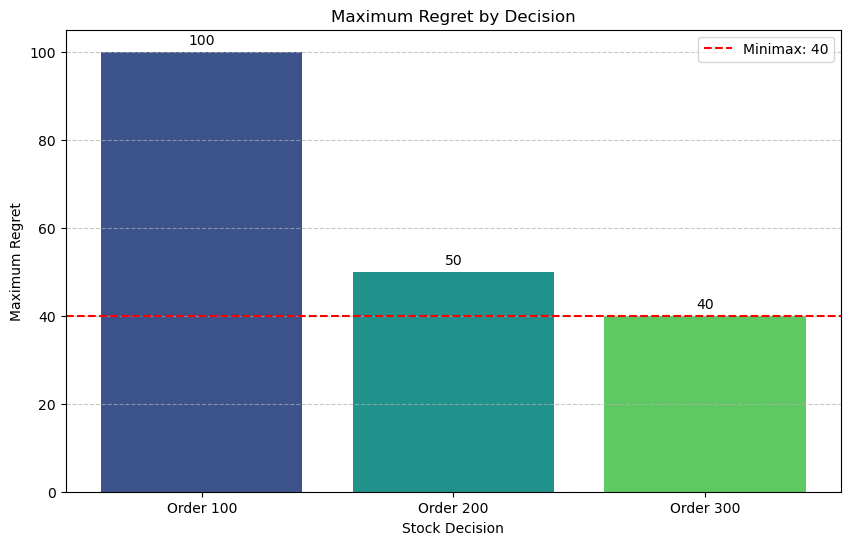

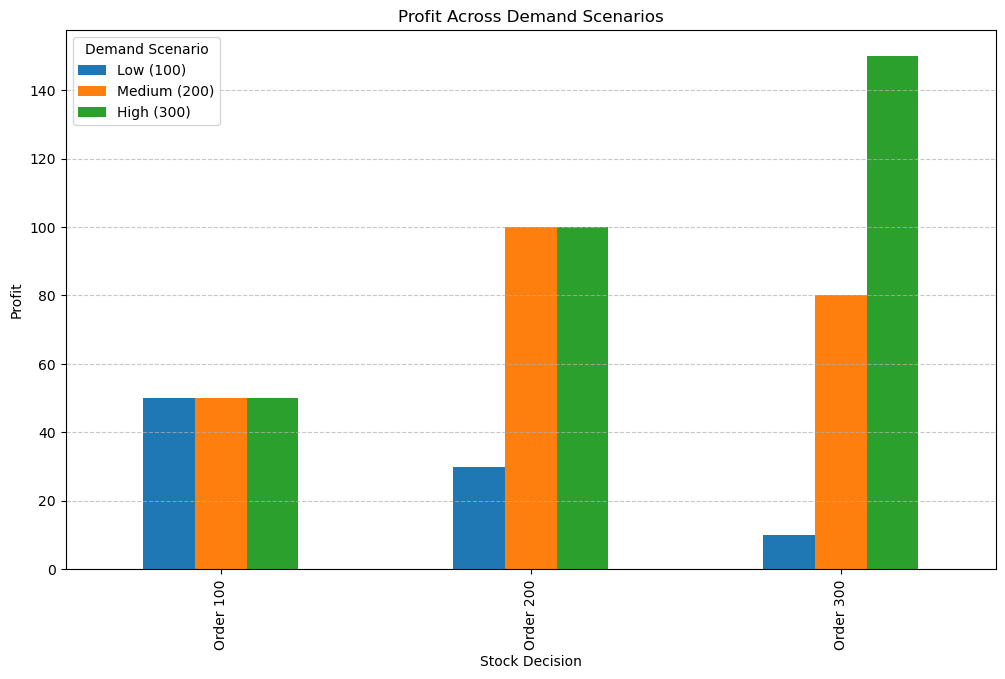

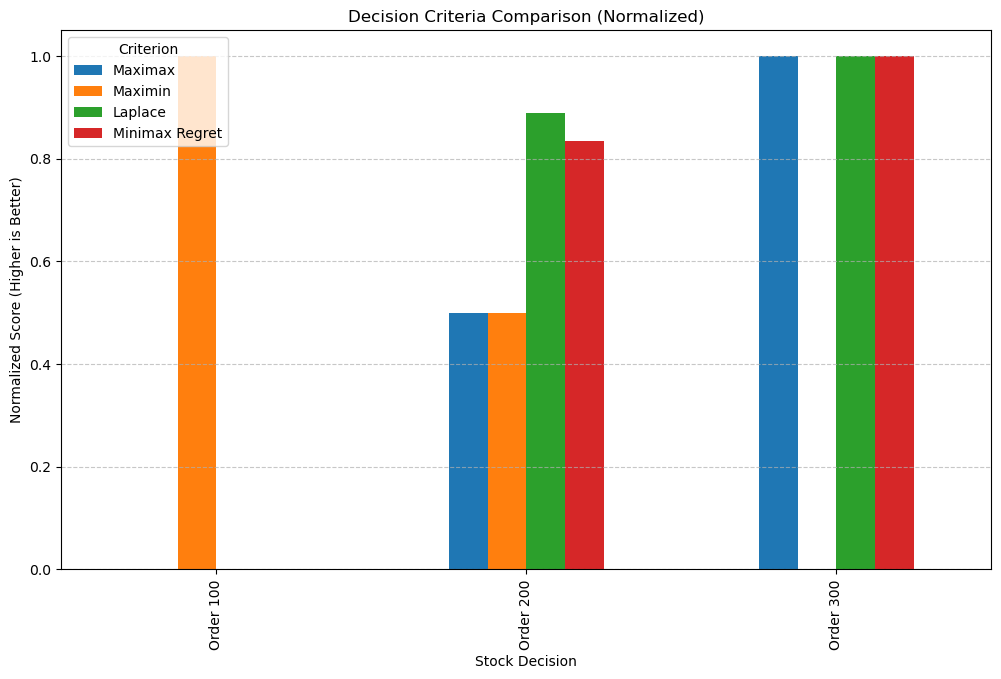

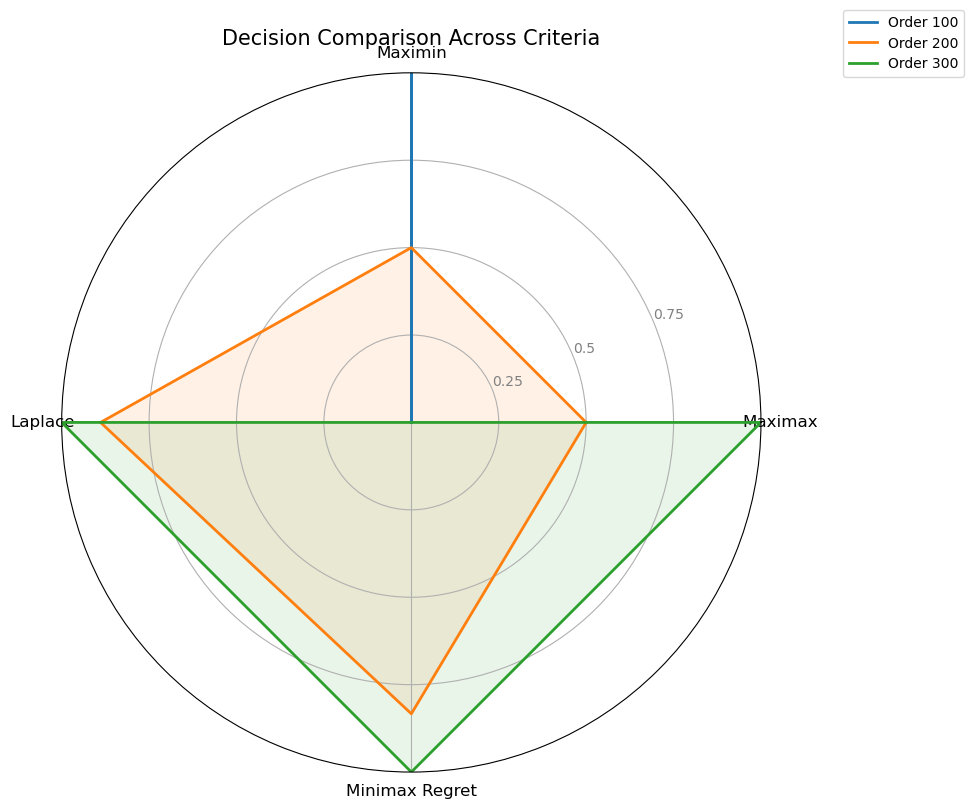

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dữ liệu
decisions = ['Order 100', 'Order 200', 'Order 300']
scenarios = ['Low (100)', 'Medium (200)', 'High (300)']
profits = pd.DataFrame({
    'Low (100)': [50, 30, 10],
    'Medium (200)': [50, 100, 80],
    'High (300)': [50, 100, 150]
}, index=decisions)

# Tính Regret Table
regrets = profits.apply(lambda col: col.max() - col)

# Tính các tiêu chí quyết định
max_regrets = regrets.max(axis=1)
criteria = pd.DataFrame({
    'Maximax': profits.max(axis=1),
    'Maximin': profits.min(axis=1),
    'Laplace': profits.mean(axis=1),
    'Minimax Regret': -max_regrets
})

# Kết quả quyết định
minimax_decision = max_regrets.idxmin()
print(f"Minimax Regret Decision: {minimax_decision} (Regret: {max_regrets.min()})")
print(f"\nDecision Criteria:\n{criteria}")

# Chuẩn hóa để so sánh
normalized = criteria.apply(lambda col: (col - col.min()) / (col.max() - col.min()) if col.max() != col.min() else col)

# Biểu đồ 1: Regret Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(regrets, annot=True, cmap="YlGnBu", fmt=".0f", cbar_kws={'label': 'Regret'})
plt.title('Regret Table Heatmap')
plt.tight_layout()

# Biểu đồ 2: Maximum Regret
plt.figure(figsize=(10, 6))
bars = plt.bar(decisions, max_regrets, color=sns.color_palette("viridis", 3))
plt.axhline(y=max_regrets.min(), color='r', linestyle='--', 
            label=f'Minimax: {max_regrets.min()}')
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 1, f'{h:.0f}', ha='center', va='bottom')
plt.title('Maximum Regret by Decision')
plt.xlabel('Stock Decision')
plt.ylabel('Maximum Regret')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Biểu đồ 3: Profit Comparison
profits.plot(kind='bar', figsize=(12, 7))
plt.title('Profit Across Demand Scenarios')
plt.xlabel('Stock Decision')
plt.ylabel('Profit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Demand Scenario')

# Biểu đồ 4: Criteria Comparison (Normalized)
normalized.plot(kind='bar', figsize=(12, 7))
plt.title('Decision Criteria Comparison (Normalized)')
plt.xlabel('Stock Decision')
plt.ylabel('Normalized Score (Higher is Better)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Criterion')

# Biểu đồ 5: Radar Chart
categories = list(normalized.columns)
N = len(categories)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=12)
ax.set_ylim(0, 1)
ax.set_yticks([0.25, 0.5, 0.75])
ax.set_yticklabels(["0.25", "0.5", "0.75"], color="grey", size=10)

for i, dec in enumerate(decisions):
    values = normalized.loc[dec].tolist() + [normalized.loc[dec].iloc[0]]
    ax.plot(angles, values, linewidth=2, label=dec)
    ax.fill(angles, values, alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Decision Comparison Across Criteria', size=15, pad=20)
plt.tight_layout()
plt.show()

### Bài 4: Bayesian Analysis

Survey or not?


--------------------------------------------------------------------------------
BAYESIAN ANALYSIS - MARKET RESEARCH
--------------------------------------------------------------------------------

PRIOR: {'Success': 0.4, 'Failure': 0.6}
CONDITIONAL: {'Success': {'Fav': 0.8, 'Unfav': 0.2}, 'Failure': {'Fav': 0.3, 'Unfav': 0.7}}

JOINT: {('Fav', 'Success'): 0.32, ('Unfav', 'Success'): 0.08, ('Fav', 'Failure'): 0.18, ('Unfav', 'Failure'): 0.42}
MARGINAL: {'Fav': 0.5, 'Unfav': 0.5}
POSTERIOR: {'Fav': {'Success': 0.64, 'Failure': 0.36}, 'Unfav': {'Success': 0.16, 'Failure': 0.84}}


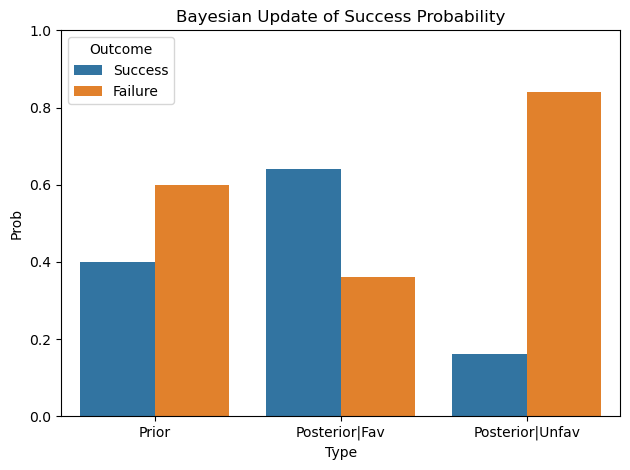


EXPECTED VALUE (in $1000s):
  Prior     : $10.00k
  Fav       : $46.00k
  Unfav     : $-26.00k


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("\n" + "-" * 80)
print("BAYESIAN ANALYSIS - MARKET RESEARCH")
print("-" * 80)

# Prior & Conditional probabilities
prior = {'Success': 0.4, 'Failure': 0.6}
cond = {'Success': {'Fav': 0.8, 'Unfav': 0.2},
        'Failure': {'Fav': 0.3, 'Unfav': 0.7}}

# Joint and Marginal probabilities
joint = {(s, st): prior[st] * cond[st][s] for st in prior for s in ['Fav', 'Unfav']}
marginal = {s: sum(joint[(s, st)] for st in prior) for s in ['Fav', 'Unfav']}

# Posterior probabilities (Bayes)
post = {s: {st: joint[(s, st)] / marginal[s] for st in prior} for s in ['Fav', 'Unfav']}

# Display results
print("\nPRIOR:", prior)
print("CONDITIONAL:", cond)
print("\nJOINT:", {k: round(v, 3) for k, v in joint.items()})
print("MARGINAL:", {k: round(v, 3) for k, v in marginal.items()})
print("POSTERIOR:", {k: {s: round(v, 3) for s, v in post[k].items()} for k in post})

# Visualization
data = pd.DataFrame({
    'Type': ['Prior'] * 2 + ['Posterior|Fav'] * 2 + ['Posterior|Unfav'] * 2,
    'Outcome': ['Success', 'Failure'] * 3,
    'Prob': [prior['Success'], prior['Failure'],
             post['Fav']['Success'], post['Fav']['Failure'],
             post['Unfav']['Success'], post['Unfav']['Failure']]
})

sns.barplot(x='Type', y='Prob', hue='Outcome', data=data)
plt.title('Bayesian Update of Success Probability')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Expected Value (in $1000s)
profit, loss = 100, -50
EV = {
    'Prior': prior['Success']*profit + prior['Failure']*loss,
    'Fav': post['Fav']['Success']*profit + post['Fav']['Failure']*loss,
    'Unfav': post['Unfav']['Success']*profit + post['Unfav']['Failure']*loss
}

print("\nEXPECTED VALUE (in $1000s):")
for k, v in EV.items():
    print(f"  {k:10s}: ${v:.2f}k")


### Bài 5: Multi-Criteria Decision

In [26]:
# BÀI 5: Multi-Criteria Decision
print("\n" + "-" * 80)
print("BÀI 5: MULTI-CRITERIA DECISION ANALYSIS - LỰA CHỌN NHÀ CUNG CẤP")
print("-" * 80)

suppliers = ['Supplier A', 'Supplier B', 'Supplier C']
criteria = ['Price', 'Quality', 'Delivery', 'Service']
weights = {'Price': 0.35, 'Quality': 0.30, 'Delivery': 0.20, 'Service': 0.15}

scores = pd.DataFrame({
    'Price': [8, 6, 7],
    'Quality': [7, 9, 8],
    'Delivery': [6, 8, 9],
    'Service': [9, 7, 6]
}, index=suppliers)




--------------------------------------------------------------------------------
BÀI 5: MULTI-CRITERIA DECISION ANALYSIS - LỰA CHỌN NHÀ CUNG CẤP
--------------------------------------------------------------------------------



BẢNG ĐIỂM CÓ TRỌNG SỐ:
            Price  Quality  Delivery  Service  Total Score
Supplier A   2.80      2.1       1.2     1.35         7.45
Supplier B   2.10      2.7       1.6     1.05         7.45
Supplier C   2.45      2.4       1.8     0.90         7.55

✅ Nhà cung cấp tốt nhất: Supplier C với tổng điểm: 7.55


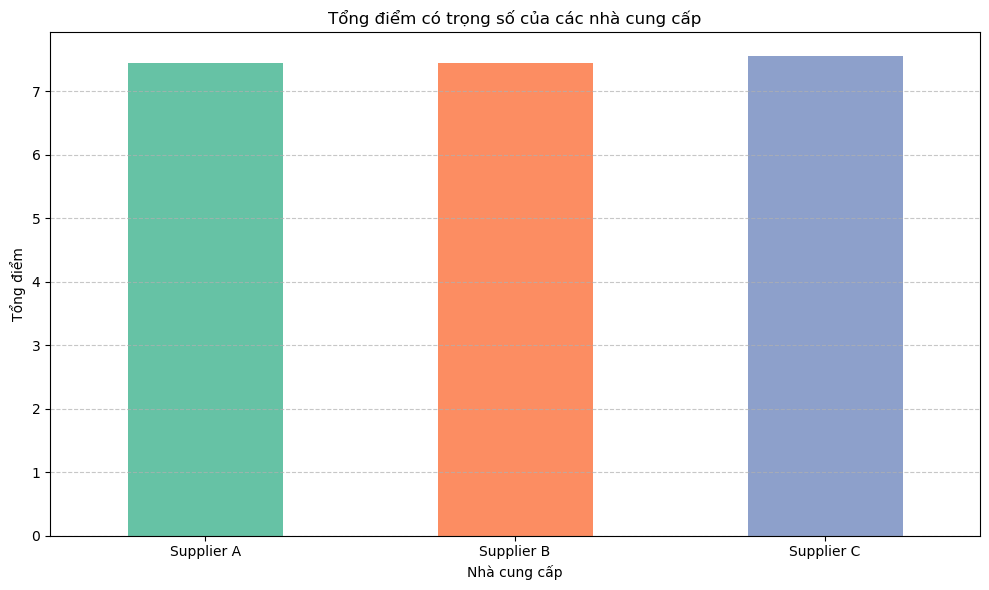

In [27]:


# Tính điểm số có trọng số
weighted_scores = scores.copy()
for criterion in criteria:
    weighted_scores[criterion] = scores[criterion] * weights[criterion]

# Tổng điểm cho từng nhà cung cấp
weighted_scores['Total Score'] = weighted_scores.sum(axis=1)

# Nhà cung cấp tốt nhất
best_supplier = weighted_scores['Total Score'].idxmax()
best_score = weighted_scores['Total Score'].max()

# In kết quả
print("\nBẢNG ĐIỂM CÓ TRỌNG SỐ:")
print(weighted_scores)
print(f"\n✅ Nhà cung cấp tốt nhất: {best_supplier} với tổng điểm: {best_score:.2f}")

# Biểu đồ trực quan hóa
plt.figure(figsize=(10, 6))
weighted_scores['Total Score'].plot(kind='bar', color=sns.color_palette("Set2"))
plt.title('Tổng điểm có trọng số của các nhà cung cấp')
plt.ylabel('Tổng điểm')
plt.xlabel('Nhà cung cấp')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## PHẦN 2: REGRESSION MODEL


### BÀI 6: Simple Linear Regression

Xây dựng mô hình hồi quy dự đoán giá nhà theo diện tích. Đánh giá mô hình vừa xây dựng

In [8]:
import numpy as np
import statsmodels.api as sm
df = pd.read_csv("house_prices_hcmc.csv")
X =  df['Area_sqm']
y = df['Price_Billion_VND']
X = sm.add_constant(X)
model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      Price_Billion_VND   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              2348.
Date:                Mon, 06 Oct 2025   Prob (F-statistic):                    9.12e-71
Time:                        12:18:36   Log-Likelihood:                         -215.45
No. Observations:                 100   AIC:                                      432.9
Df Residuals:                      99   BIC:                                      435.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Bài 7: Multiple Regression

Xây dựng mô hình dự đoán giá nhà dựa trên nhiều thuộc tính định lượng khác nhau. Đánh giá mô hình vừa xây dựng

In [9]:
print(df.dtypes)

House_ID                  object
District                  object
Area_sqm                   int64
Bedrooms                   int64
Bathrooms                  int64
Floor_Level                int64
Age_years                  int64
Distance_to_Center_km    float64
Has_Parking               object
Listing_Date              object
Price_Billion_VND        float64
dtype: object


In [11]:
dat_trung = ['Area_sqm', 'Bedrooms', 'Bathrooms', 'Floor_Level', 'Age_years', 'Distance_to_Center_km']
X = df[dat_trung]
y = df['Price_Billion_VND']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Price_Billion_VND   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     114.5
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           1.01e-40
Time:                        12:33:35   Log-Likelihood:                -139.14
No. Observations:                 100   AIC:                             292.3
Df Residuals:                      93   BIC:                             310.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.57

### Bài 8: Polynomial Regression

So sánh các dạng mô hình: tuyến tính, bậc 2, bậc 3 với nhau

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['Area_sqm']])
mo_hinh = LinearRegression().fit(X_poly,df['Price_Billion_VND'])
print("hệ số hồi quy: ",mo_hinh.coef_)
print("Intercept : ",mo_hinh.intercept_ )

hệ số hồi quy:  [0.00000000e+00 4.71163842e-02 2.20005611e-05]
Intercept :  4.4328182368764075


### Bài 9: Categorical Variables

Xây dựng mô hình hồi quy sử dụng thêm các biến định tính

In [14]:
import statsmodels.formula.api as smf

model = smf.ols('Price_Billion_VND ~ Area_sqm + Bedrooms + District + Has_Parking', data=df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Price_Billion_VND   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     214.8
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           3.19e-52
Time:                        12:53:05   Log-Likelihood:                -110.55
No. Observations:                 100   AIC:                             235.1
Df Residuals:                      93   BIC:                             253.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

### Bài 10: Feature Selection

Hãy so sánh 3 mô hình dự đoán giá nhà dựa vào các thuộc tính sau đây:
- 'Model 1': ['Area_sqm'],
- 'Model 2': ['Area_sqm', 'Bedrooms'],
- 'Model 3': ['Area_sqm', 'Bedrooms', 'Distance_km', 'Age_years'],

In [15]:
# YOUR CODE HERE

## PHẦN 3: FORECASTING

Sử dụng dataset Monthly Sales tính.

In [18]:
df = pd.read_csv("monthly_sales_data.csv")
df.sort_values("Date",inplace=True)


### Bài 11: Moving Average

So sánh 3 phương pháp dự đoán khác nhau: `Naive`, M`oving Average(window=3)`, `Moving Average(window=6)`

In [16]:
# YOUR CODE HERE

### Bài 12: Exponential Smoothing

Sử dụng phương pháp Exponential Smoothing, tìm alpha tối ưu

In [ ]:
# YOUR CODE HERE

### Bài 13: Trend Analysis

Xây dựng đường xu hướng, và đánh giá

In [ ]:
# YOUR CODE HERE

### Bài 14: Forecast Accuracy

Sử dung các độ đo khác nhau, đánh giá 3 phương pháp: `Naive`, `Moving Average` và `Trend`

In [ ]:
# YOUR CODE HERE

---